# COVID19 Case Numbers

## Getting the Data

Case data from [Johns Hopkins University Center for Systems Science and Engineering](https://systems.jhu.edu/) are provided by [datahub](https://datahub.io/core/covid-19#readme).

In [1]:
url = "http://datahub.io/core/covid-19/r/key-countries-pivoted.csv"

Unfortunately it can not be imported directly into a pandas data frame, though the [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function should accept an URL with the http scheme. 

In [2]:
# import pandas as pd

# df = pd.read_csv(url, sep=",")

Thus we need to get the data via `requests` and `StringIO`. The data can then be loaded into a pandas datframe

In [3]:
import io, requests
import pandas as pd

response = requests.get(url)
source = io.StringIO(response.content.decode('utf-8'))

df = pd.read_csv(source, sep=",")

In [4]:
df

Date  China     US  United_Kingdom  Italy  France  Germany  Spain  \
0   2020-01-22    548      1               0      0       0        0      0   
1   2020-01-23    643      1               0      0       0        0      0   
2   2020-01-24    920      2               0      0       2        0      0   
3   2020-01-25   1406      2               0      0       3        0      0   
4   2020-01-26   2075      5               0      0       3        0      0   
5   2020-01-27   2877      5               0      0       3        1      0   
6   2020-01-28   5509      5               0      0       4        4      0   
7   2020-01-29   6087      5               0      0       5        4      0   
8   2020-01-30   8141      5               0      0       5        4      0   
9   2020-01-31   9802      7               2      2       5        5      0   
10  2020-02-01  11891      8               2      2       6        8      1   
11  2020-02-02  16630      8               2      2       6       10      1   
12  2020-02-03  19716     11               2      2       6       12      1   
13  2020-02-04  23707     11               2      2       6       12      1   
14  2020-02-05  27440     11               2      2       6       12      1   
15  2020-02-06  30587     11               2      2       6       12      1   
16  2020-02-07  34110     11               3      3       6       13      1   
17  2020-02-08  36814     11               3      3      11       13      1   
18  2020-02-09  39829     11               3      3      11       14      2   
19  2020-02-10  42354     11               8      3      11       14      2   
20  2020-02-11  44386     12               8      3      11       16      2   
21  2020-02-12  44759     12               9      3      11       16      2   
22  2020-02-13  59895     13               9      3      11       16      2   
23  2020-02-14  66358     13               9      3      11       16      2   
24  2020-02-15  68413     13               9      3      12       16      2   
25  2020-02-16  70513     13               9      3      12       16      2   
26  2020-02-17  72434     13               9      3      12       16      2   
27  2020-02-18  74211     13               9      3      12       16      2   
28  2020-02-19  74619     13               9      3      12       16      2   
29  2020-02-20  75077     13               9      3      12       16      2   
..         ...    ...    ...             ...    ...     ...      ...    ...   
35  2020-02-26  78166     57              13    453      18       27     13   
36  2020-02-27  78600     58              15    655      38       46     15   
37  2020-02-28  78928     60              20    888      57       48     32   
38  2020-02-29  79356     68              23   1128     100       79     45   
39  2020-03-01  79932     74              36   1694     130      130     84   
40  2020-03-02  80136     98              40   2036     191      159    120   
41  2020-03-03  80261    118              51   2502     204      196    165   
42  2020-03-04  80386    149              86   3089     288      262    222   
43  2020-03-05  80537    217             116   3858     380      482    259   
44  2020-03-06  80690    262             164   4636     656      670    400   
45  2020-03-07  80770    402             207   5883     959      799    500   
46  2020-03-08  80823    518             274   7375    1136     1040    673   
47  2020-03-09  80860    583             322   9172    1219     1176   1073   
48  2020-03-10  80887    959             384  10149    1794     1457   1695   
49  2020-03-11  80921   1281             459  12462    2293     1908   2277   
50  2020-03-12  80932   1663             459  12462    2293     2078   2277   
51  2020-03-13  80945   2179             802  17660    3681     3675   5232   
52  2020-03-14  80977   2727            1144  21157    4496     4585   6391   
53  2020-03-15  81003   3499            1145  24747    4532 

<IPython.core.display.Javascript object>


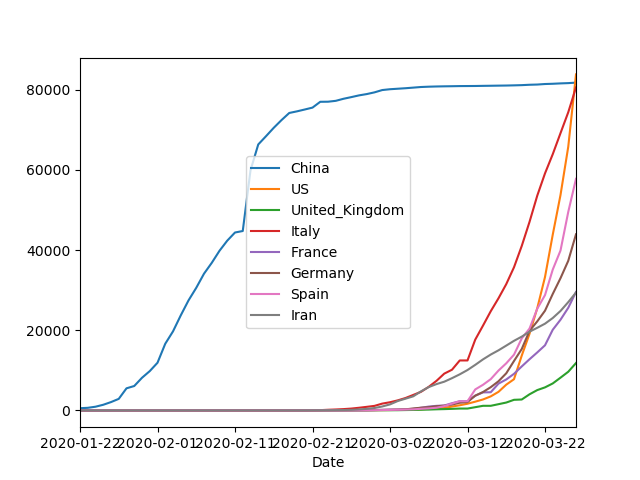

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt

df.plot(x='Date')
plt.show()

## Analysing the Data

### Exponential Growth

Case numbers during the beginning of an epidemic (or pandemic) grow exponentially. 

Thus the data reveal their secrets when the y-axis is logarithmically scaled. This is the situation on **March 27**, 2020.

<IPython.core.display.Javascript object>


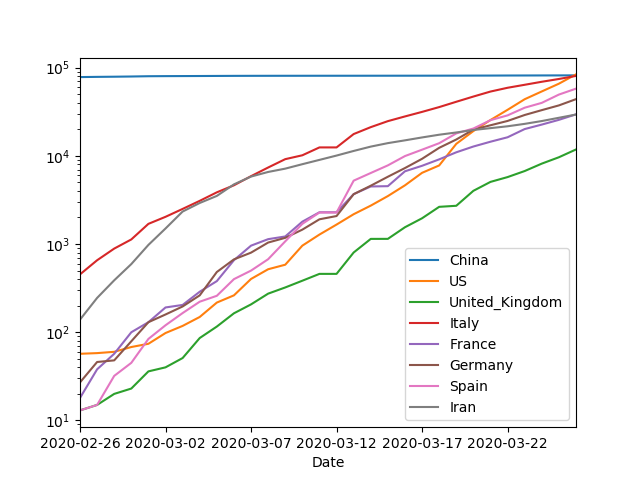

In [6]:
df.loc[35:64].plot(x='Date')
plt.yscale('log')
plt.show()

This plot is already quite revealing:
- **China** seems to have stopped the spread of the virus.
- **Iran** experienced a unusually steep growth rate in the end of February. In mid March it is significantly lower than in other countries.
- The growth rates in the **US** is higher than in other countries (and still rising).
- Growth rates in **France** and **Germany** seem to flatten down at the end of March.

### Growth factors

Exponential growth is characterised by the ratio of the *new cases one day* and the *new cases a certain time before* (e. g. the previous day):

$$\mbox{Growth factor} = \frac{\Delta N_d}{\Delta N_{d-1}}$$

In [7]:
a = df.iloc[1:,1:].reset_index(drop=True)   # skip first row
b = df.iloc[:-1,1:].reset_index(drop=True)  # skip last row
d = df.loc[1:,'Date'].reset_index(drop=True) # Date column
gf = pd.concat([d, a/b], axis=1)

gf

Date     China        US  United_Kingdom     Italy    France  \
0   2020-01-23  1.173358  1.000000             NaN       NaN       NaN   
1   2020-01-24  1.430793  2.000000             NaN       NaN       inf   
2   2020-01-25  1.528261  1.000000             NaN       NaN  1.500000   
3   2020-01-26  1.475818  2.500000             NaN       NaN  1.000000   
4   2020-01-27  1.386506  1.000000             NaN       NaN  1.000000   
5   2020-01-28  1.914842  1.000000             NaN       NaN  1.333333   
6   2020-01-29  1.104919  1.000000             NaN       NaN  1.250000   
7   2020-01-30  1.337440  1.000000             NaN       NaN  1.000000   
8   2020-01-31  1.204029  1.400000             inf       inf  1.000000   
9   2020-02-01  1.213120  1.142857        1.000000  1.000000  1.200000   
10  2020-02-02  1.398537  1.000000        1.000000  1.000000  1.000000   
11  2020-02-03  1.185568  1.375000        1.000000  1.000000  1.000000   
12  2020-02-04  1.202424  1.000000        1.000000  1.000000  1.000000   
13  2020-02-05  1.157464  1.000000        1.000000  1.000000  1.000000   
14  2020-02-06  1.114687  1.000000        1.000000  1.000000  1.000000   
15  2020-02-07  1.115180  1.000000        1.500000  1.500000  1.000000   
16  2020-02-08  1.079273  1.000000        1.000000  1.000000  1.833333   
17  2020-02-09  1.081898  1.000000        1.000000  1.000000  1.000000   
18  2020-02-10  1.063396  1.000000        2.666667  1.000000  1.000000   
19  2020-02-11  1.047977  1.090909        1.000000  1.000000  1.000000   
20  2020-02-12  1.008404  1.000000        1.125000  1.000000  1.000000   
21  2020-02-13  1.338167  1.083333        1.000000  1.000000  1.000000   
22  2020-02-14  1.107906  1.000000        1.000000  1.000000  1.000000   
23  2020-02-15  1.030968  1.000000        1.000000  1.000000  1.090909   
24  2020-02-16  1.030696  1.000000        1.000000  1.000000  1.000000   
25  2020-02-17  1.027243  1.000000        1.000000  1.000000  1.000000   
26  2020-02-18  1.024533  1.000000        1.000000  1.000000  1.000000   
27  2020-02-19  1.005498  1.000000        1.000000  1.000000  1.000000   
28  2020-02-20  1.006138  1.000000        1.000000  1.000000  1.000000   
29  2020-02-21  1.006300  1.153846        1.000000  6.666667  1.000000   
..         ...       ...       ...             ...       ...       ...   
34  2020-02-26  1.005299  1.117647        1.000000  1.406832  1.285714   
35  2020-02-27  1.005552  1.017544        1.153846  1.445916  2.111111   
36  2020-02-28  1.004173  1.034483        1.333333  1.355725  1.500000   
37  2020-02-29  1.005423  1.133333        1.150000  1.270270  1.754386   
38  2020-03-01  1.007258  1.088235        1.565217  1.501773  1.300000   
39  2020-03-02  1.002552  1.324324        1.111111  1.201889  1.469231   
40  2020-03-03  1.001560  1.204082        1.275000  1.228880  1.068063   
41  2020-03-04  1.001557  1.262712        1.686275  1.234612  1.411765   
42  2020-03-05  1.001878  1.456376        1.348837  1.248948  1.319444   
43  2020-03-06  1.001900  1.207373        1.413793  1.201659  1.726316   
44  2020-03-07  1.000991  1.534351        1.262195  1.268982  1.461890   
45  2020-03-08  1.000656  1.288557        1.323671  1.253612  1.184567   
46  2020-03-09  1.000458  1.125483        1.175182  1.243661  1.073063   
47  2020-03-10  1.000334  1.644940        1.192547  1.106520  1.471698   
48  2020-03-11  1.000420  1.335766        1.195312  1.227904  1.278149   
49  2020-03-12  1.000136  1.298205        1.000000  1.000000  1.000000   
50  2020-03-13  1.000161  1.310283        1.747277  1.417108  1.605321   
51  2020-03-14  1.000395  1.251492        1.426434  1.198018  1.221407   
52  2020-03-15  1.000321  1.283095        1.000874  1.169684  1.008007   
53  2020-03-16  1.000370  1.323807        1.354585  1.130642  1.474625   
54  2020-03-17  1.000309  1.386226        1.263701  1.126019  1.154422   
55  2020-03-18  1.000543  1.212116        1.347959  1.133530  1.182631   
56  2020-03-19

<IPython.core.display.Javascript object>


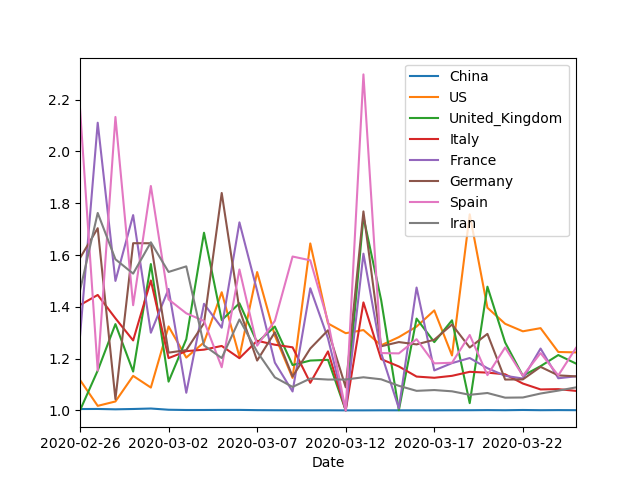

In [8]:
gf.iloc[34:63].plot(x='Date')

#### Germany 2020-03-20

<IPython.core.display.Javascript object>


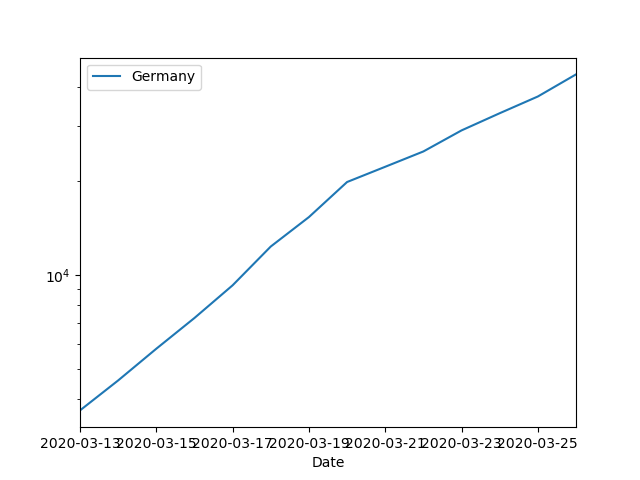

In [9]:
df.loc[51:].plot(x='Date', y='Germany')
plt.yscale('log')
plt.show()

In [10]:
gf_de = gf.loc[51:,['Date','Germany']]
gf_de

Date   Germany
51  2020-03-14  1.247619
52  2020-03-15  1.263904
53  2020-03-16  1.254875
54  2020-03-17  1.272965
55  2020-03-18  1.331641
56  2020-03-19  1.242800
57  2020-03-20  1.295561
58  2020-03-21  1.119156
59  2020-03-22  1.119750
60  2020-03-23  1.168174
61  2020-03-24  1.135256
62  2020-03-25  1.131480
63  2020-03-26  1.177237

<IPython.core.display.Javascript object>


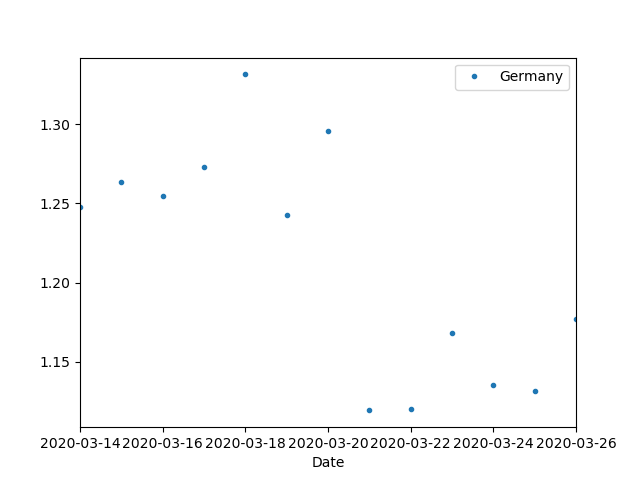

In [11]:
gf_de.plot(x='Date', y='Germany', style='.')

In [35]:
import numpy as np

split = gf_de['Germany'] < 1.2
k1 = np.log(gf_de.loc[~split,'Germany']).mean()
k2 = np.log(gf_de.loc[split,'Germany']).mean()
f1 = np.exp(k1)
f2 = np.exp(k2)

In [36]:
(f1, f2)

(1.272439253686457, 1.1439139612796496)

average growth factor and reduplication time in Germany from March 14 to March 20:

<IPython.core.display.Javascript object>


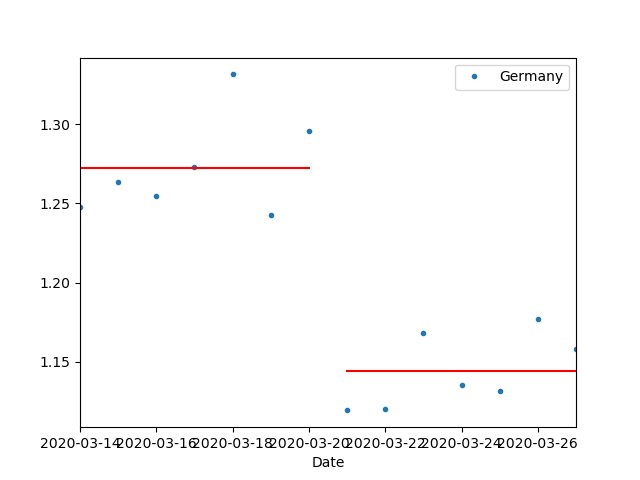

In [40]:
gf_de.plot(x='Date', y='Germany', style='.')
plt.plot([0, 6], [f1, f1], 'r-')
plt.plot([7, 13], [f2, f2], 'r-')

$$N(d+1) = N(d)\cdot f$$
$$N(d+x) = N(d)\cdot f^x$$
$$N(d+x) = 2\cdot N(d) = N(d)\cdot f^x \mathbin{\Leftrightarrow} x = \log_f 2 = \frac{\log 2}{\log f}$$

In [38]:
T1 = np.log(2.0)/k1
(f1, T1)

(1.272439253686457, 2.876896585778907)

average growth factor and reduplication time in Germany from March 21 to March 27:

In [39]:
T2 = np.log(2.0)/k2
(f2, T2)

(1.1439139612796496, 5.155209307969863)